# Low Rank Factorization

In this chapter, we discuss decomposition of the sample into components. The first step in decompostion procedure is performed physically by the chromatography device and it achieves that purpose to a certain extent. However, that is not enough especially in cases where the peaks do not separate well from each other. In general, including such inconvenient cases, we can further decompose programmatically. Mathematically, this decomposition corresponds to the low rank factorizaion of matrices. We will show here how you can achieve this with Molas Library.

## Learning Points

* decomposition = ssd.quick_decomposition(options)
  * options:
    * num_comonents=n
    * proportions=[p1, p2, ...]
    * num_plates=1440
    * ranks=[r1, r2, ...]
* decomposition.get_proportions()

## Default Decomposition

In the default setting, i.e. without optional parameters, decomposition will be simply performed using the visible peaks.

For example, in case of "SAMPLE1", number of components will be two as shown below. 

zeros at the angular ends of error data have been replaced with the adjacent values.


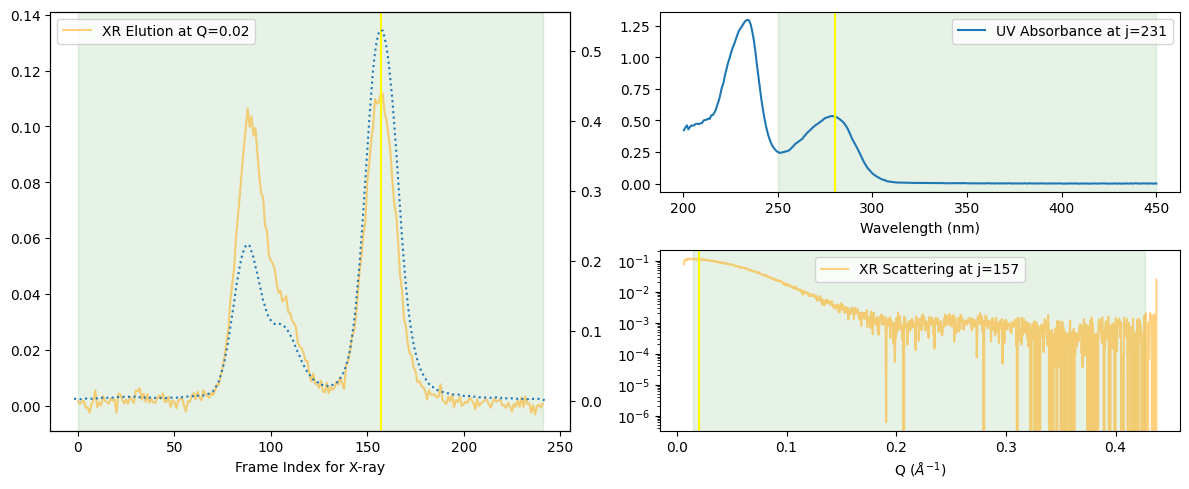

In [12]:
from molass import get_version
assert get_version() >= '0.2.0', "This tutorial requires molass version 0.2.0 or higher."
from molass_data import SAMPLE1
from molass.DataObjects import SecSaxsData as SSD
ssd = SSD(SAMPLE1)
ssd.plot_compact();

zeros at the angular ends of error data have been replaced with the adjacent values.
developer memo: remember that "LowRank.CoupledAdjuster.select_components" is not implemented yet.


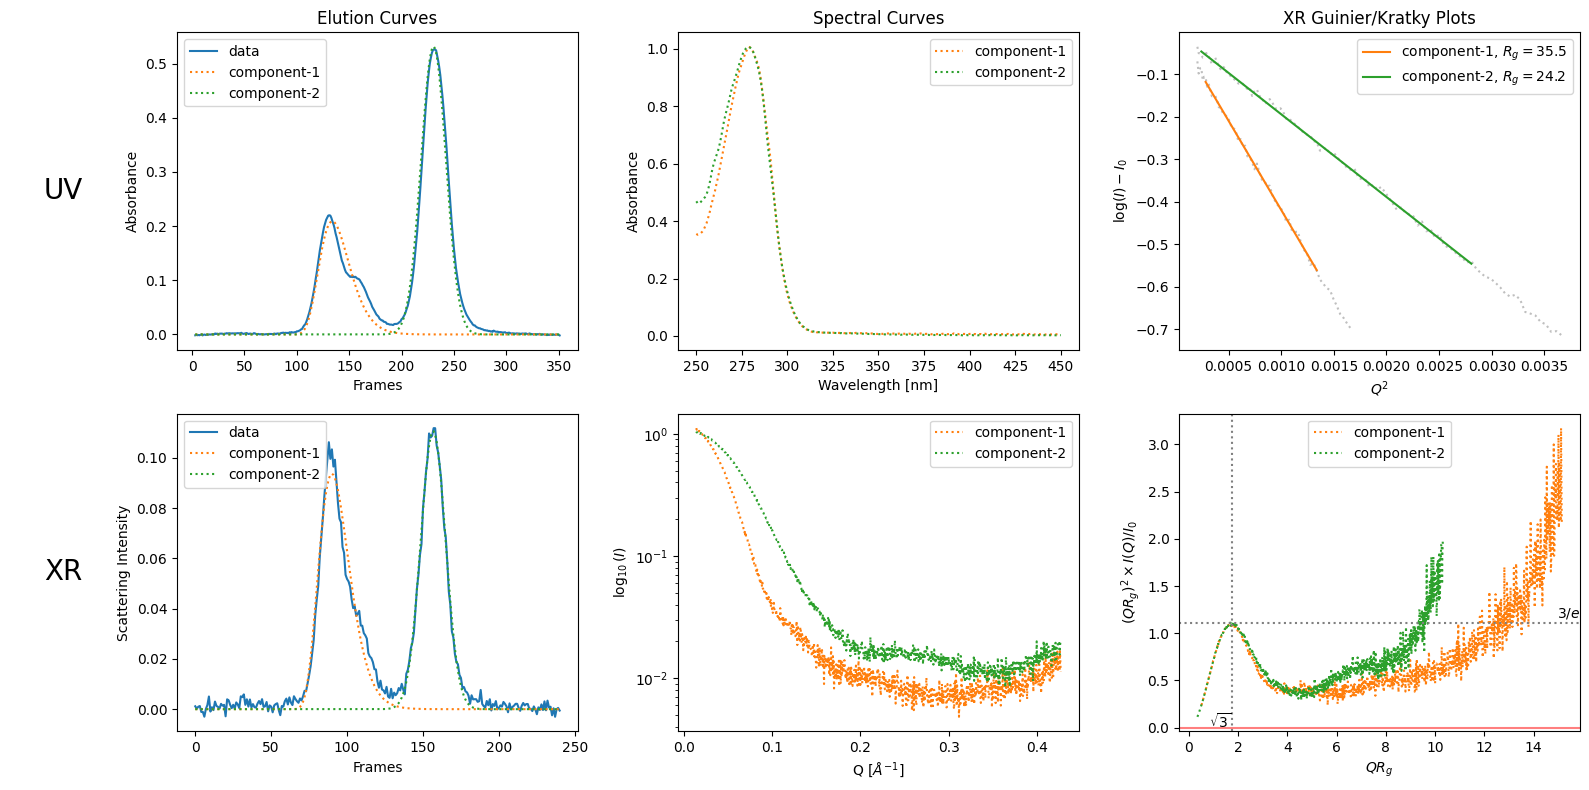

In [13]:
trimmed_ssd = ssd.trimmed_copy()
corrected_ssd = trimmed_ssd.corrected_copy()
decomposition = corrected_ssd.quick_decomposition()
plot1 = decomposition.plot_components() 

## Number of Components

As stated in the first chapter, "SAMPLE1" shows a bulk in the right (descending) side of the first peak. This is a sign which indicates the existance of another (probably slightly different) component in the first peak. To take into account this observation, the simplest way is to explicitly specify the number of comonents as follows.

developer memo: remember that "LowRank.CoupledAdjuster.select_components" is not implemented yet.


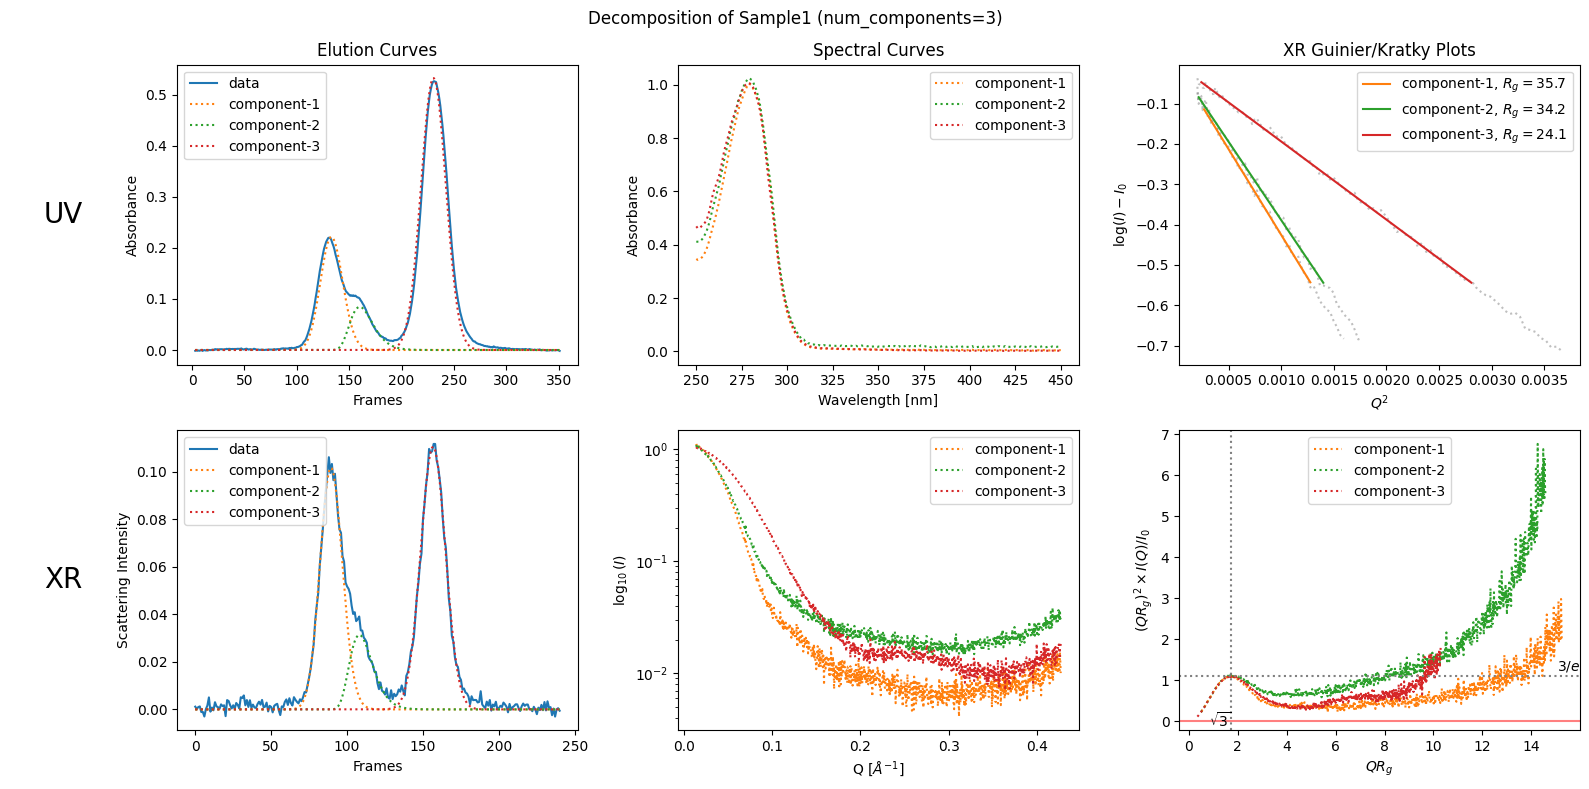

In [14]:
decomposition3 = corrected_ssd.quick_decomposition(num_components=3)
plot2 = decomposition3.plot_components(title="Decomposition of Sample1 (num_components=3)") 

## Area Proportions

Another and a little more precise way is to specify the proportions of each component. To achieve this, get the current proportions first as follows.

In [15]:
proportions = decomposition3.get_proportions()
proportions

array([0.39450525, 0.12825418, 0.47724056])

Then, modify them, for example, as follows.

developer memo: remember that "LowRank.CoupledAdjuster.select_components" is not implemented yet.


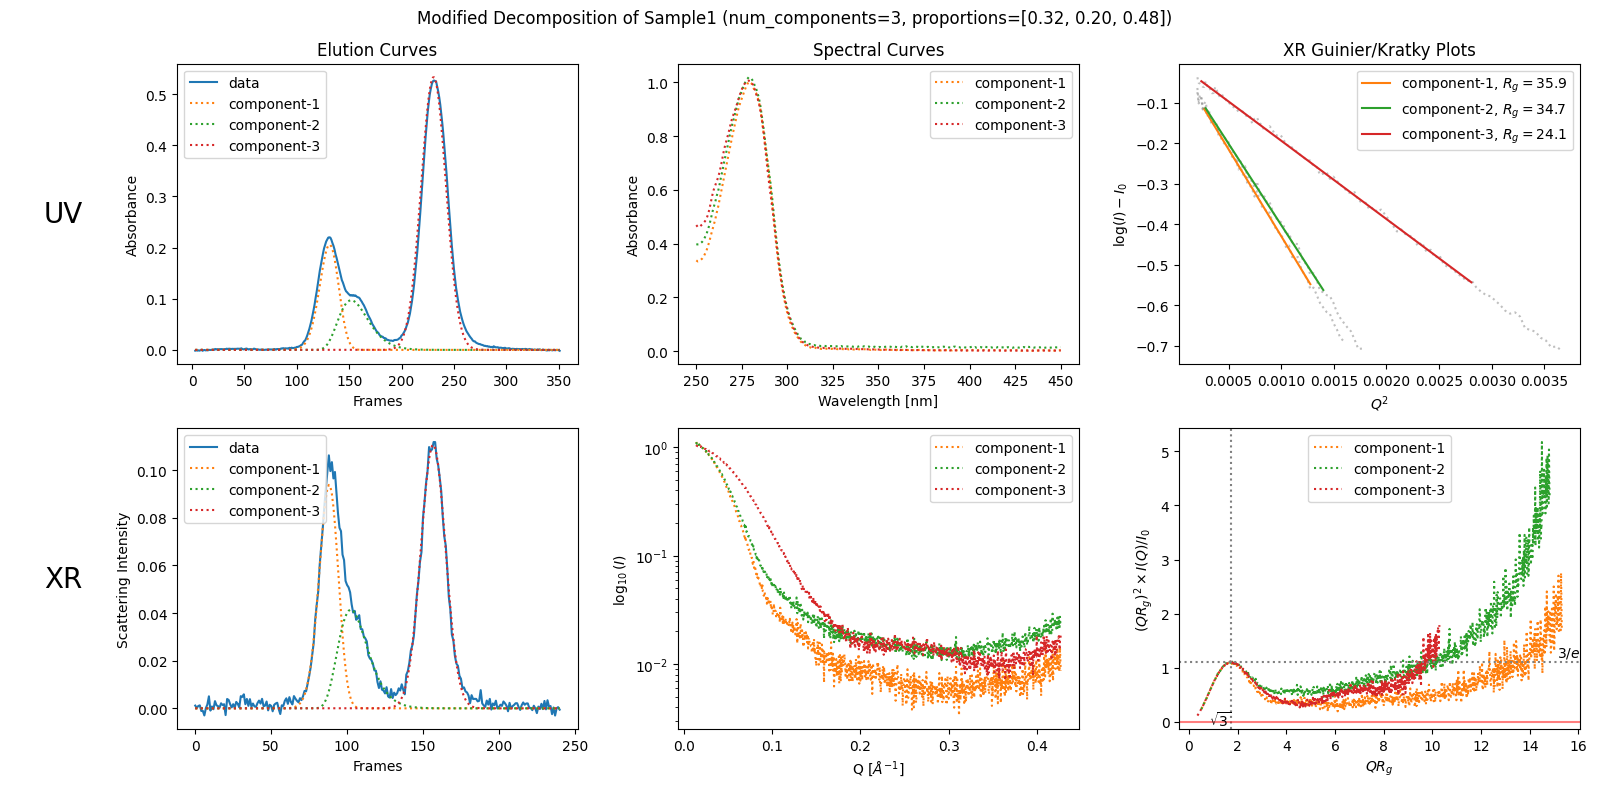

In [16]:
modified_decomposition = corrected_ssd.quick_decomposition(num_components=3, proportions=[0.32, 0.20, 0.48])
plot2 = modified_decomposition.plot_components(title="Modified Decomposition of Sample1 (num_components=3, proportions=[0.32, 0.20, 0.48])") 

Since the proportions to be specified are arbitrary, you should have a good reason for the appropriate proportions. 

## Unrealistic Decomposition (Under-determinedness)

In this above example, the decomposition may have seemed rather obvious. However, in reality, it is not that simple.

See the example below. Molass decomposes this sample (SAMPLE2) into unrealistic components.

In [17]:
from molass_data import SAMPLE2
ssd2 = SSD(SAMPLE2)
trimmed_ssd2 = ssd2.trimmed_copy()
corrected_ssd2 = trimmed_ssd2.corrected_copy()

developer memo: remember that "LowRank.CoupledAdjuster.select_components" is not implemented yet.


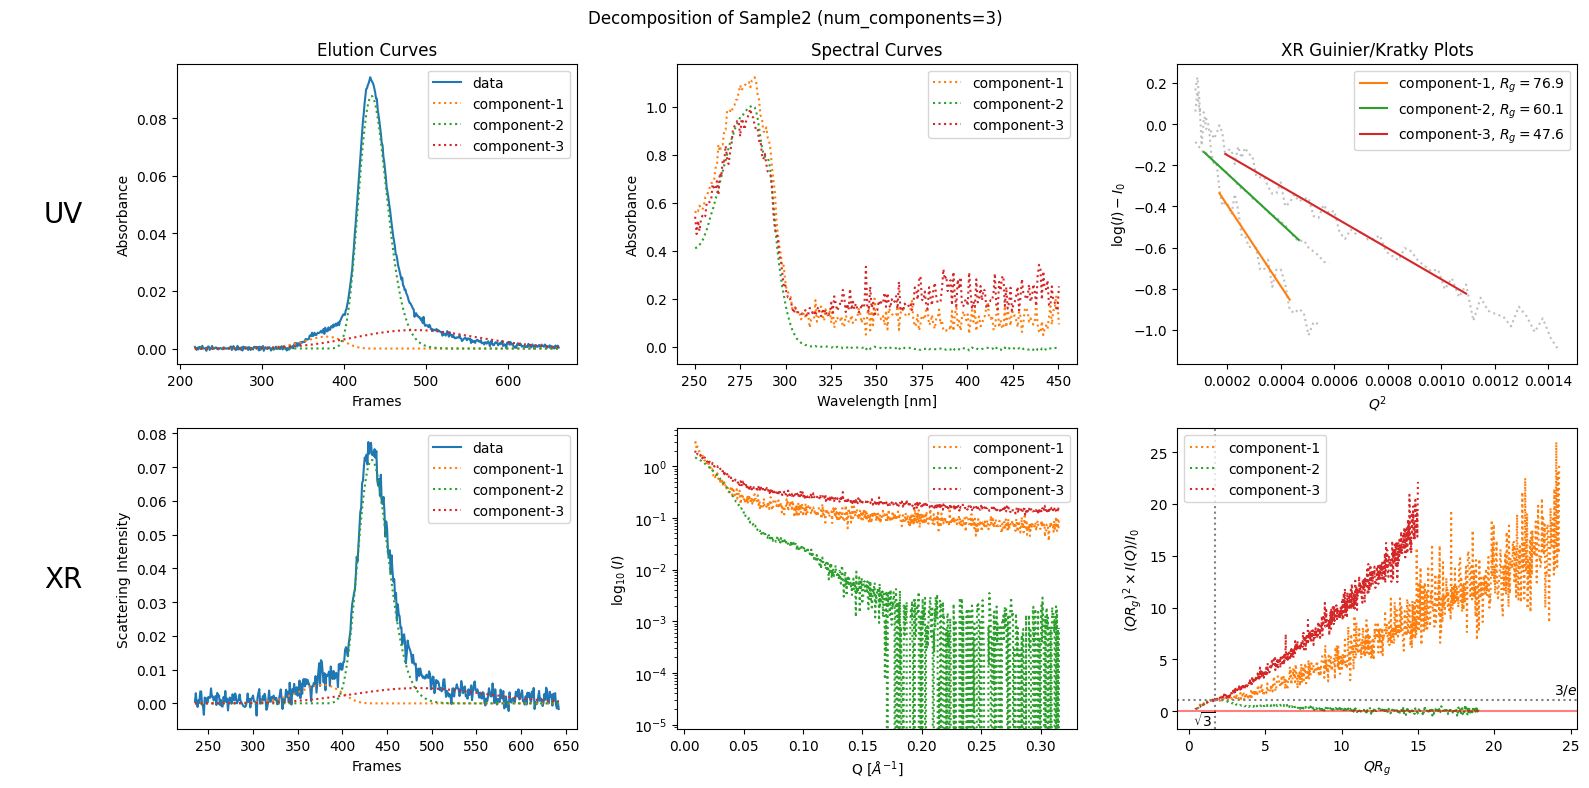

In [18]:
decomposition23 = corrected_ssd2.quick_decomposition(num_components=3)
plot4 = decomposition23.plot_components(title="Decomposition of Sample2 (num_components=3)")

This decomposition does fit the data, but peak widths should not vary irregularly like this according to the classical theory of chromatography.

## Theoretical Number of Plates (Plate Number)

The classical theory states that the peak widths should increase regularly as the fucntion of retention time (see the note below).
To take into account this regularity, we can specify the plate number as follow.

```{note}
The plate number is defined as follows.

$ \frac{t_R^2}{\sigma^2} = N \qquad or \qquad \frac{t_R^2}{\sigma^2 + \tau^2} = N $

where

* $t_R$ : retention time (measured from injection)
* $\sigma$ : standard deviation of the component peak
* $\tau$ : asymmtry parameter in the EGH model

This formula indicates the above rule on peak widths.

More precise discussion is planned to be described in [Molass Essence](https://nshimizu0721.github.io/molass-essence/).
```

developer memo: remember that "LowRank.CoupledAdjuster.select_components" is not implemented yet.


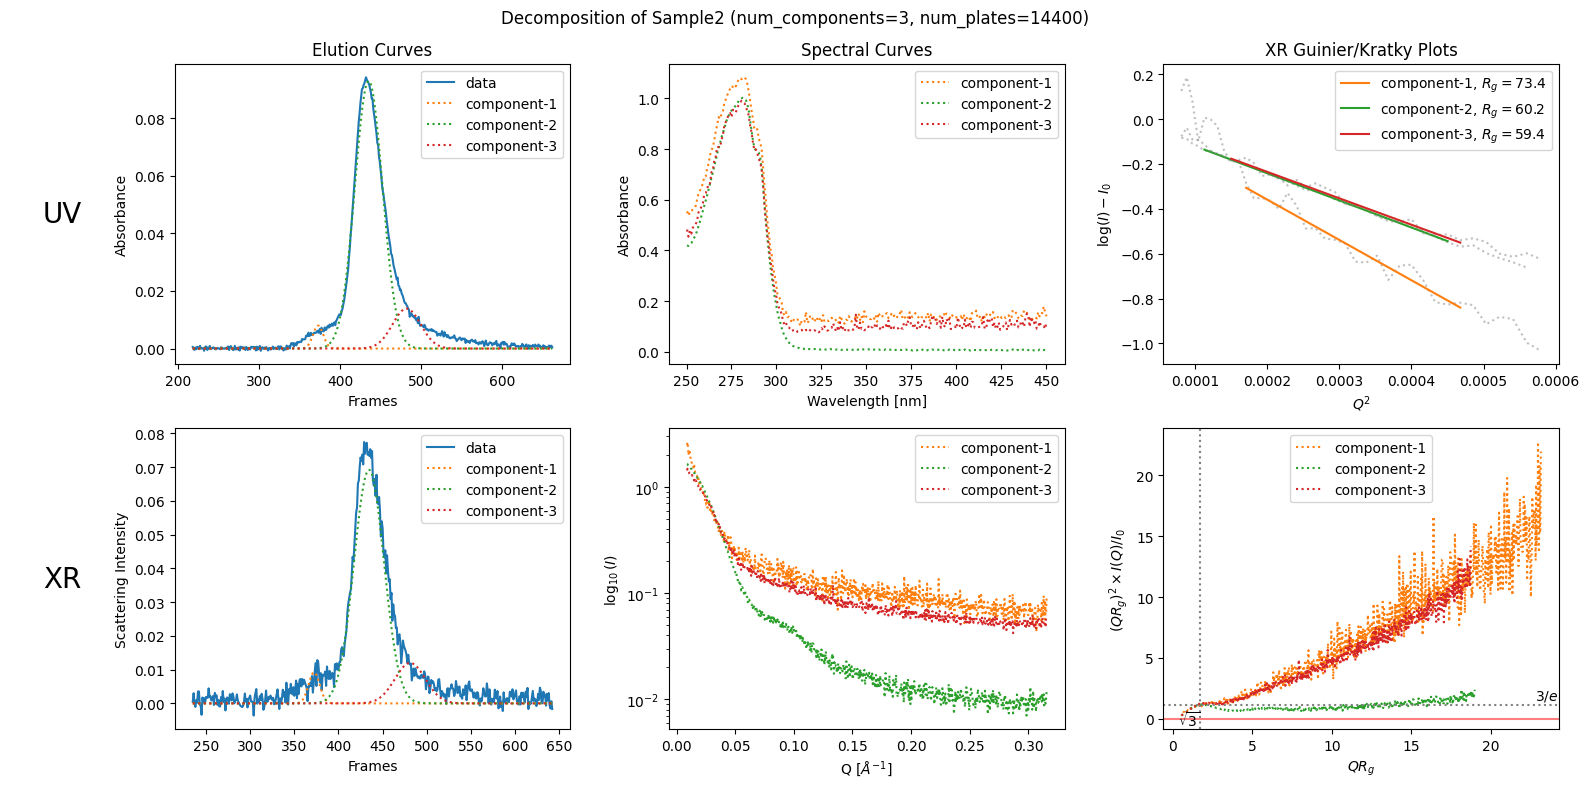

In [19]:
decomposition23n = corrected_ssd2.quick_decomposition(num_components=3, num_plates=14400)   # 14400 = 48000 * 30cm/100cm
plot5 = decomposition23n.plot_components(title="Decomposition of Sample2 (num_components=3, num_plates=14400)")

In this revised decomposition plot, the component curves are more realistic than before (in the sense of classical plate theory) while they do not fit the data well. This worsened fit indicates that this result is not satisfactory either, but it leads to an advanced understanding that this sample can not be decomposed so easily as shown previously (as unrealistic one).  

## Component Ranks (Interparticle Interaction Effects)

### As Rank 1 Component

Molass by default regards each component as rank 1. This means that the component data can be expressed as a matrix defined as the matrix multiplication of a transposed column vector (n by 1 matrix) and a row vector (1 by m matrix).

However, there are cases where this assumption is not appropriate. For example, see the bending Giunier plot of "SAMPLE3" shown below, which does not obey the law.

```{note}
Precise discussion is planned to be described in [Molass Essence](https://nshimizu0721.github.io/molass-essence/).
```

In [20]:
from molass_data import SAMPLE3
ssd3 = SSD(SAMPLE3)

developer memo: remember that "LowRank.CoupledAdjuster.select_components" is not implemented yet.


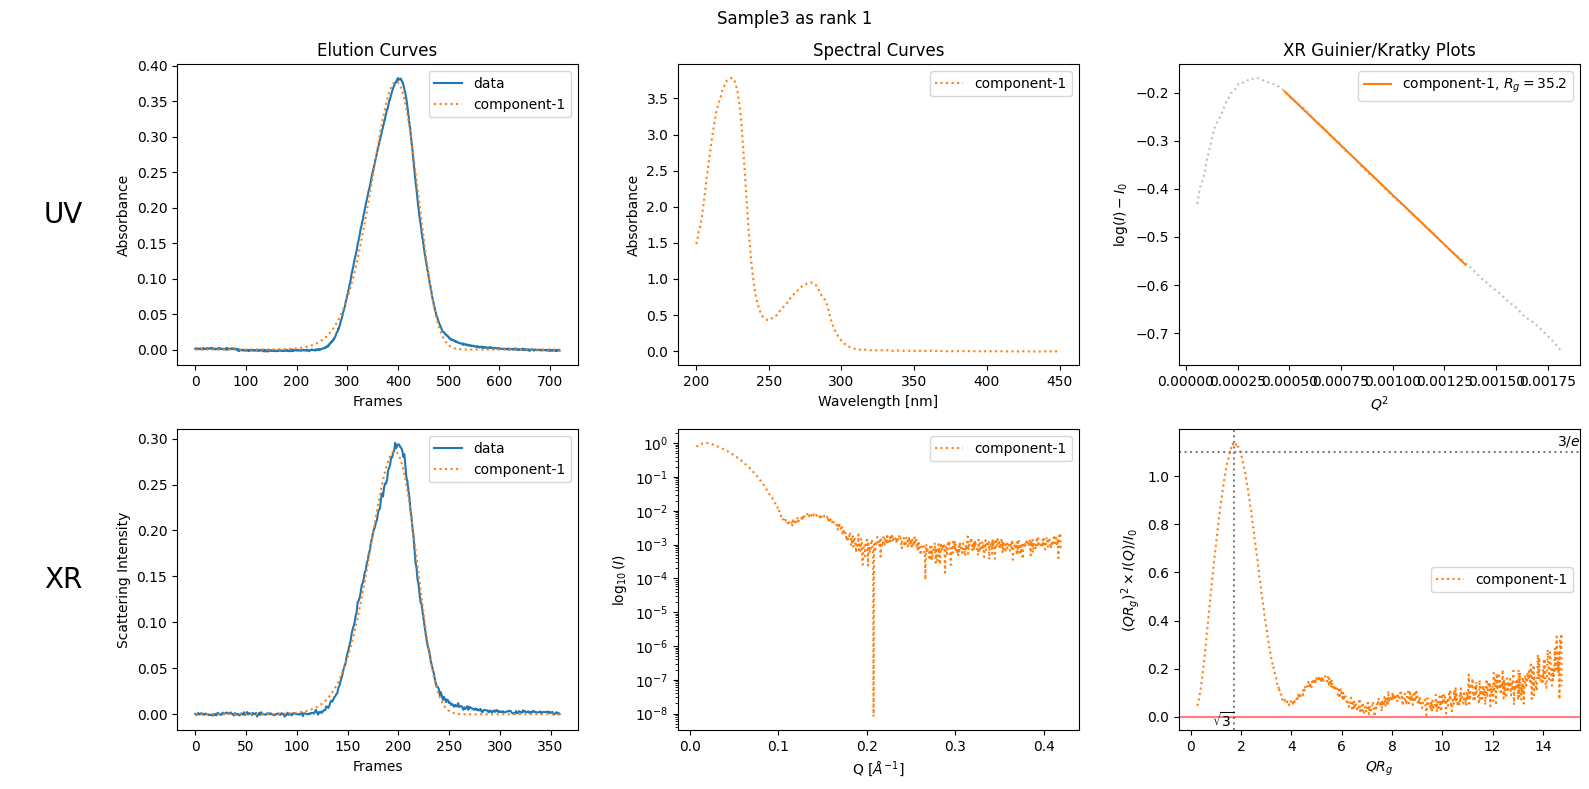

In [21]:
decomposition31 = ssd3.quick_decomposition()
plot6 = decomposition31.plot_components(title="Sample3 as rank 1")

### As Rank 2 Component

The above failure can be considered as a result of the false assumption that the rank of the component peak is one. To fix this, specify the rank as two. This will result in the expected linear Guinier plot shown below.

developer memo: remember that "LowRank.CoupledAdjuster.select_components" is not implemented yet.


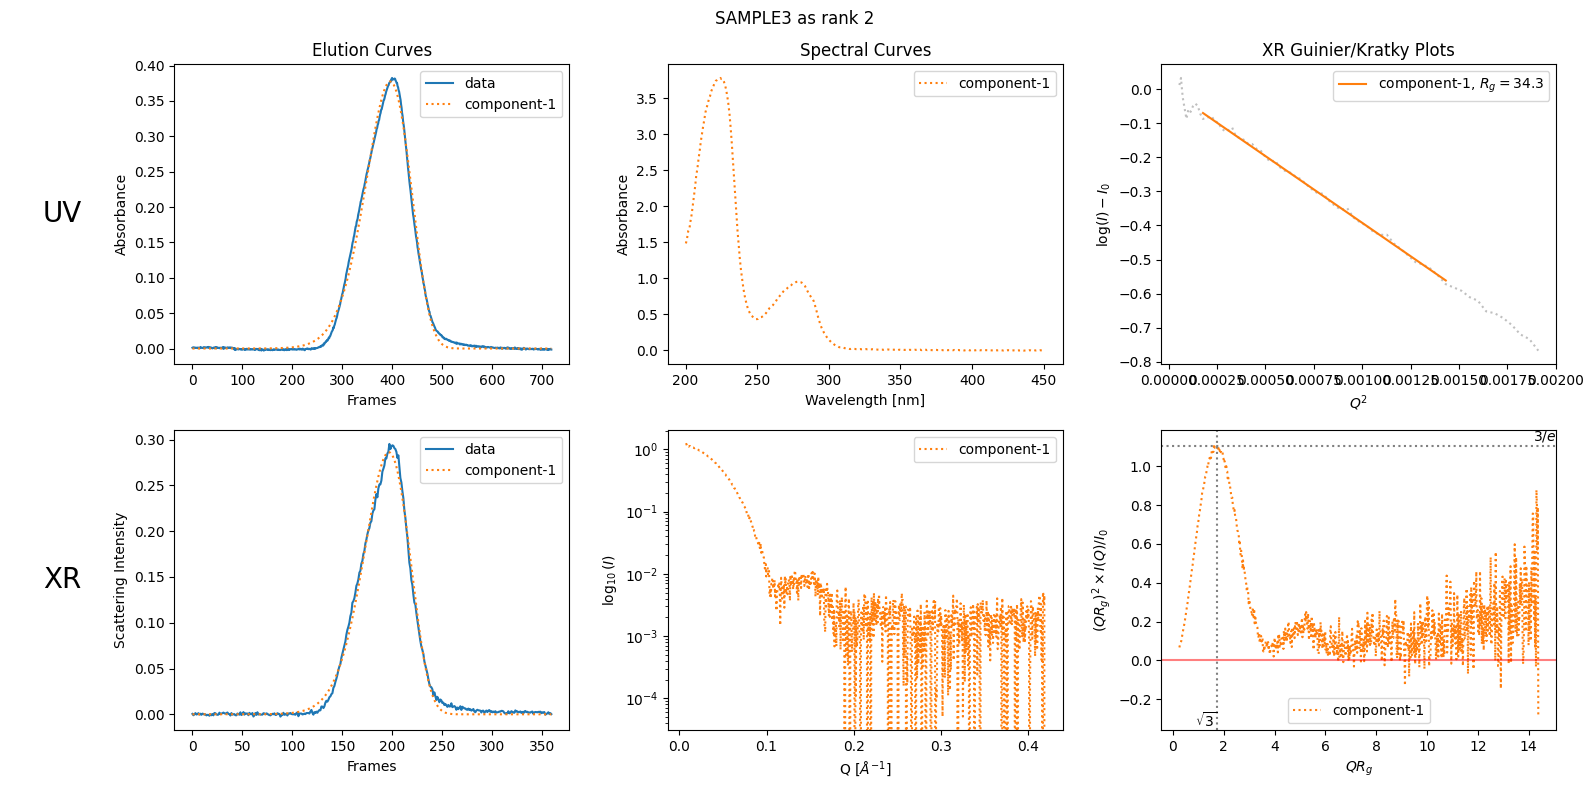

In [22]:
decomposition31 = ssd3.quick_decomposition()
decomposition31.update_xr_ranks(ranks=[2]) 
plot6 = decomposition31.plot_components(title="SAMPLE3 as rank 2", debug=True)

We will explore more on how to estimate the ranks in the next chapter [Rank Estimation](rank_estimation).

## Elution Curve Modeling

To achieve the decomposition, Molass can use different curve models.

* EGH: Exponential Gaussian Hybrid (default)
* SDM: Stochastic Dispersive Model 
* EDM: Equilibrium Dispersive Model

How to ustilize these models is beyond the scope of this tutorial and left to the advanced documents:

* [Molass Library Essence](https://nshimizu0721.github.io/molass-essence/)
* [Molass Technical Report](https://freesemt.github.io/molass-technical/)

